In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re
from wordcloud import WordCloud
from PIL import Image
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [193]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [194]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\공공데이터포털\과학기술정책연구원_과학기술정책 동영상 정보\*')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\과학기술정책연구원_과학기술정책 동영상 정보\\과학기술정책연구원 과학기술정책 동영상..csv']

In [195]:
df = pd.read_csv(files[0],encoding='cp949')
df.head()

,대분류,중분류,동영상 제목,동영상 포맷,자막 여부,키워드,동영상 파일 URL 주소,작성일자,동영상 페이지 URL,자막
0,과학기술,과학기술일반,?[발표]제404회 과학기술정책포럼 - 중국의 혁신드라이브정책과 국가연구개발,YouTube,N,#중국#신소재#해양#기초과학#혁신드라이브#바이오,http://www.stepi.re.kr/vod/view.jsp?ntNo=782&s...,2016.08.24,http://www.stepi.re.kr/vod/list.jsp,N
1,과학기술,과학기술일반,?[발표] 제403회 과학기술정책포럼 - 뉴프런티어 협력을 통한 한미동맹의 전환,YouTube,N,#중국#신소재#해양#기초과학#혁신드라이브#바이오,https://www.youtube.com/watch?v=-sdkR5V7ciU,2016.08.24,http://www.stepi.re.kr/vod/list.jsp,N
2,과학기술,과학기술일반,?[발표] 2016 STEPI 국제 심포지엄,YouTube,N,#뉴프런티어#과기포럼#한미동맹,https://www.youtube.com/watch?v=N-YRLKDTeTk,2016.08.16,http://www.stepi.re.kr/vod/list.jsp,N
3,과학기술,과학기술일반,?[토론] 2016 STEPI 국제 심포지엄,YouTube,N,#과기포럼#바이오헬스#정책과제,http://www.stepi.re.kr/vod/view.jsp?ntNo=780&s...,2016.06.29,http://www.stepi.re.kr/vod/list.jsp,N
4,과학기술,과학기술일반,?[발표] 제402회 과학기술정책포럼 - 미래사회 변화를 선도할 핵심기술 : 우리사...,YouTube,N,#과기포럼#바이오헬스#정책과제,http://www.stepi.re.kr/vod/view.jsp?ntNo=779&s...,2016.06.29,http://www.stepi.re.kr/vod/list.jsp,N


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   대분류            762 non-null    object
 1   중분류            762 non-null    object
 2   동영상 제목         762 non-null    object
 3   동영상 포맷         762 non-null    object
 4   자막 여부          762 non-null    object
 5   키워드            762 non-null    object
 6   동영상 파일 URL 주소  762 non-null    object
 7   작성일자           762 non-null    object
 8   동영상 페이지 URL    762 non-null    object
 9   자막             762 non-null    object
dtypes: object(10)
memory usage: 59.7+ KB


In [197]:
df.describe()

,대분류,중분류,동영상 제목,동영상 포맷,자막 여부,키워드,동영상 파일 URL 주소,작성일자,동영상 페이지 URL,자막
count,762,762,762,762,762,762,762,762,762,762
unique,1,1,757,2,1,363,760,203,1,1
top,과학기술,과학기술일반,?Global Sharing of Existing Green Technologies...,WMV,N,#국제심포지엄#STEPI#2013,http://www.youtube.com/channel/UC5Nsv1nZdcK0uJ...,2010.11.18,http://www.stepi.re.kr/vod/list.jsp,N
freq,762,762,2,640,762,15,2,34,762,762


## 전처리

In [198]:
df.drop(['대분류','중분류','자막 여부','동영상 페이지 URL','자막'],axis=1,inplace=True)

In [199]:
df['키워드'] = df['키워드'].apply(lambda x : [c.strip() for c in x.split('#')[1:]])

In [200]:
def convert_object(x):
    if '토론' in x or 'discussion' in x.lower():
        return '토론'
    elif '발표' in x or 'presentation' in x.lower():
        return '주제발표'
    elif '질의' in x:
        return '질의응답'
    elif '축사'in x or '환영사' in x or '개회사' in x or '인사' in x:
        return '개회사'
    else:
        return '주제발표'
df['동영상 분류'] = df['동영상 제목'].apply(convert_object)

In [201]:
def to_year(x):
    dat = datetime.strptime(x,'%Y.%m.%d')
    return dat.year

def to_month(x):
    dat = datetime.strptime(x,'%Y.%m.%d')
    return dat.month

df['연도'] = df['작성일자'].apply(to_year)
df['월'] = df['작성일자'].apply(to_month)

In [202]:
df.head()

,동영상 제목,동영상 포맷,키워드,동영상 파일 URL 주소,작성일자,동영상 분류,연도,월
0,?[발표]제404회 과학기술정책포럼 - 중국의 혁신드라이브정책과 국가연구개발,YouTube,"[중국, 신소재, 해양, 기초과학, 혁신드라이브, 바이오]",http://www.stepi.re.kr/vod/view.jsp?ntNo=782&s...,2016.08.24,주제발표,2016,8
1,?[발표] 제403회 과학기술정책포럼 - 뉴프런티어 협력을 통한 한미동맹의 전환,YouTube,"[중국, 신소재, 해양, 기초과학, 혁신드라이브, 바이오]",https://www.youtube.com/watch?v=-sdkR5V7ciU,2016.08.24,주제발표,2016,8
2,?[발표] 2016 STEPI 국제 심포지엄,YouTube,"[뉴프런티어, 과기포럼, 한미동맹]",https://www.youtube.com/watch?v=N-YRLKDTeTk,2016.08.16,주제발표,2016,8
3,?[토론] 2016 STEPI 국제 심포지엄,YouTube,"[과기포럼, 바이오헬스, 정책과제]",http://www.stepi.re.kr/vod/view.jsp?ntNo=780&s...,2016.06.29,토론,2016,6
4,?[발표] 제402회 과학기술정책포럼 - 미래사회 변화를 선도할 핵심기술 : 우리사...,YouTube,"[과기포럼, 바이오헬스, 정책과제]",http://www.stepi.re.kr/vod/view.jsp?ntNo=779&s...,2016.06.29,주제발표,2016,6


In [203]:
df.describe()

,연도,월
count,762.000000,762.000000
mean,2011.295276,7.062992
std,1.922467,3.307098
min,2007.000000,1.000000
25%,2010.000000,5.000000
50%,2011.000000,7.000000
75%,2013.000000,10.000000
max,2016.000000,12.000000


In [204]:
df.describe(include=np.object)

,동영상 제목,동영상 포맷,키워드,동영상 파일 URL 주소,작성일자,동영상 분류
count,762,762,762,762,762,762
unique,757,2,363,760,203,4
top,?Global Sharing of Existing Green Technologies...,WMV,"[국제심포지엄, STEPI, 2013]",http://www.youtube.com/channel/UC5Nsv1nZdcK0uJ...,2010.11.18,주제발표
freq,2,640,15,2,34,450


## 시각화

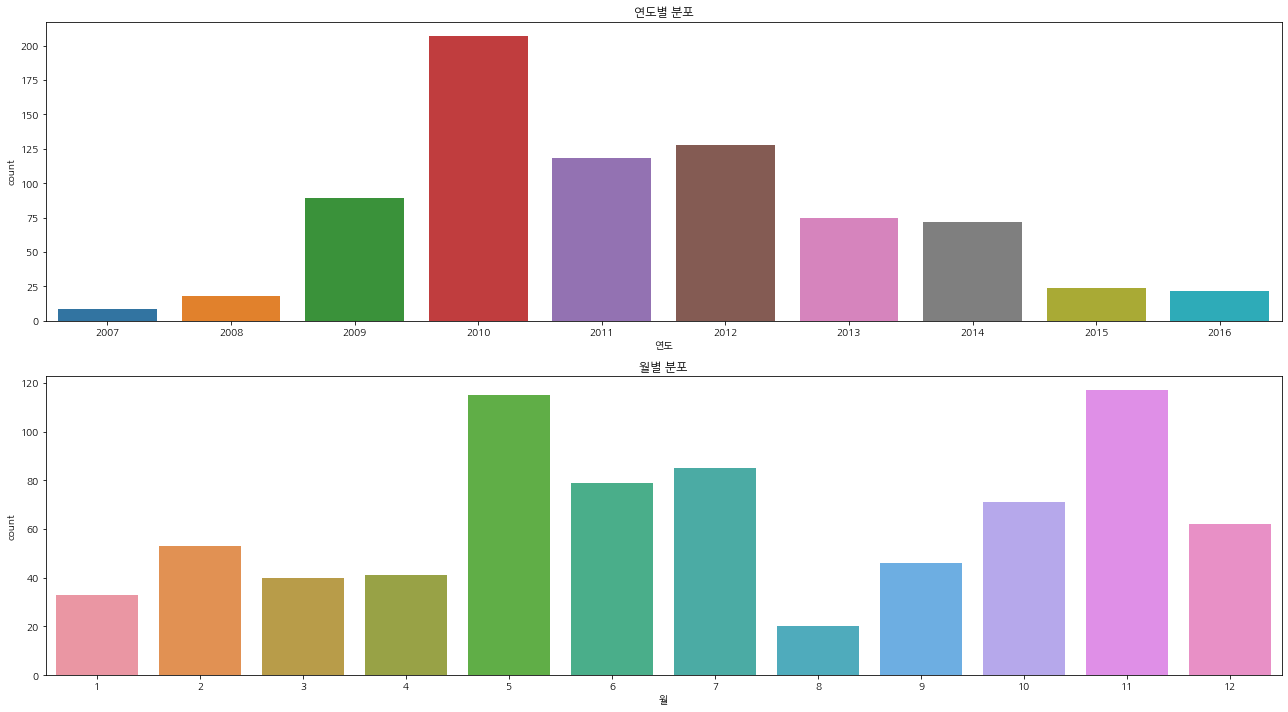

In [205]:
cols = ['연도','월']
fig,axes = plt.subplots(2,1,figsize=(18,10))
for i,c in enumerate(cols):
    sub_df = df[df[c]!=-1].groupby(c,as_index=False)['동영상 제목'].count().sort_values(c,ascending=False)
    sns.barplot(data=sub_df,x=c,y='동영상 제목',ax=axes[i]).set(title=f'{c}별 분포',ylabel='count')
plt.tight_layout()

,동영상 포맷,동영상 제목
0,WMV,640
1,YouTube,122


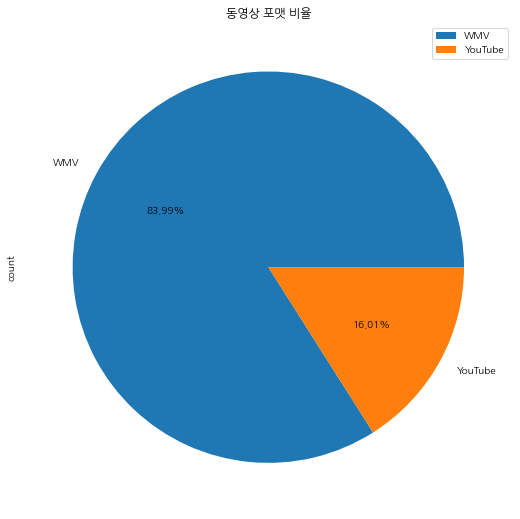

In [208]:
fig,ax = plt.subplots(1,1,figsize=(9,9))
sub_df = df.groupby('동영상 포맷',as_index=False)['동영상 제목'].count().sort_values('동영상 제목',ascending=False)
sub_df.plot.pie(y='동영상 제목',labels=sub_df['동영상 포맷'].unique(),ylabel='count',autopct='%.2f%%',ax=ax,title='동영상 포맷 비율')
sub_df

,동영상 분류,동영상 제목
1,주제발표,450
3,토론,230
0,개회사,75
2,질의응답,7


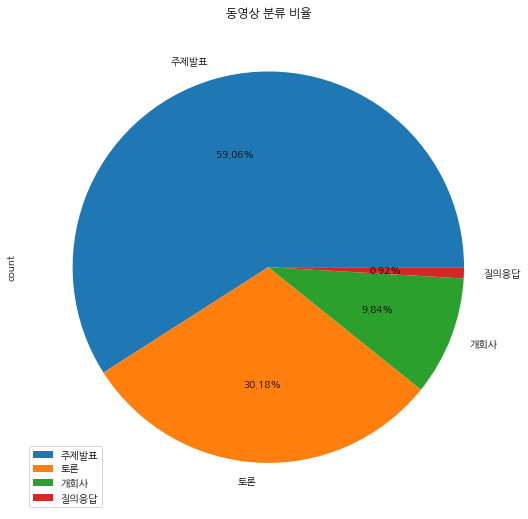

In [209]:
fig,ax = plt.subplots(1,1,figsize=(9,9))
sub_df = df.groupby('동영상 분류',as_index=False)['동영상 제목'].count().sort_values('동영상 제목',ascending=False)
sub_df.plot.pie(y='동영상 제목',labels=sub_df['동영상 분류'].unique(),ylabel='count',autopct='%.2f%%',ax=ax,title='동영상 분류 비율')
sub_df

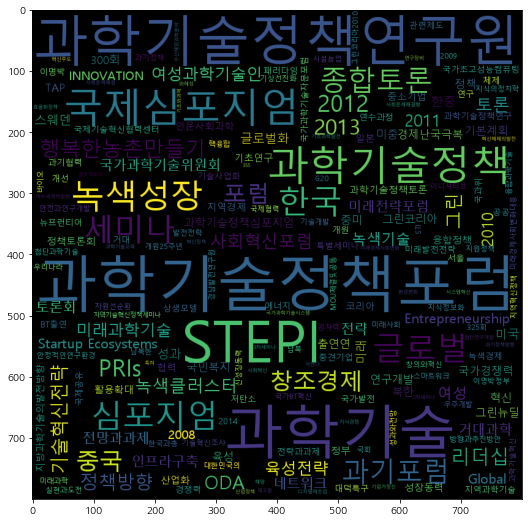

In [212]:
def keyword_dict(x):
    for k in x:
        if k not in c:
            c[k] = 1
        else:
            c[k] += 1
c = dict()
df['키워드'].apply(keyword_dict)

wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(9,9))
plt.imshow(gen)